# PRANAV V A - 18BCE0748

# ML LAB ASSIGNMENT - 3 

Importing the CSV file

In [3]:
import pandas as pd
df = pd.read_csv('./hr/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (ie, whether they leave the company or continue to work) 

In [23]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

#lABEL ENCODING THE CATEGORICAL VARIABLES

Label_encoder_depart=LabelEncoder()
Label_encoder_salary=LabelEncoder()
Department=Label_encoder_depart.fit_transform(df["Department"])
salary=Label_encoder_salary.fit_transform(df["salary"])

df1 = df.copy()
df1['Department'] = Department
df1['salary'] = salary

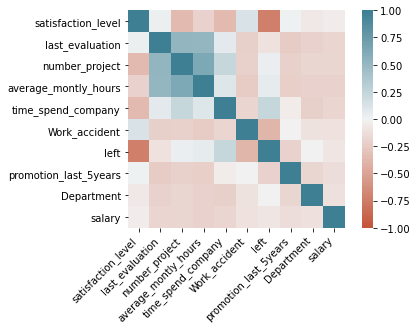

In [25]:
import seaborn as sns
columns = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years','Department','salary']
data = df1[columns].corr()

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

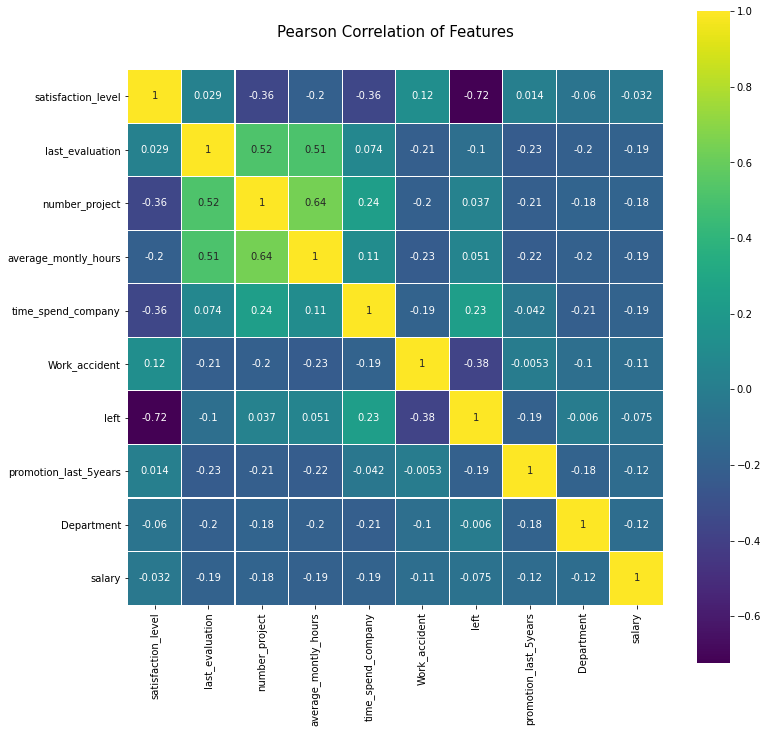

In [26]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

**It is clear from the above maps that satisfaction level plays a very big role in employee retention. So do work related accidents.**

2. Plot bar charts showing impact of employee salaries on retention

In [8]:
from matplotlib import pyplot as plt
left = df['left']
salary = df['salary']
salary_counts = salary.value_counts()
salary_counts

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [9]:
left_counts = left.value_counts()
left_counts

0    11428
1     3571
Name: left, dtype: int64

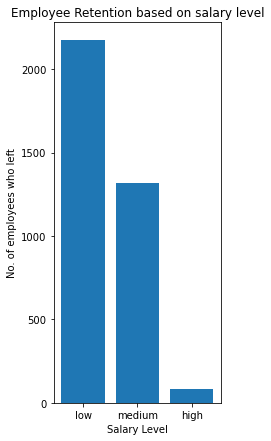

In [15]:
#Number of people who left vs their salaries

left_data = {"low": 0,"medium": 0,"high": 0}
stayed_data = {"low": 0,"medium": 0,"high": 0}
for i in range(len(left)):
    if left[i] == 1:
        left_data[salary[i]] += 1
    else:
        stayed_data[salary[i]] += 1


salaries = list(left_data.keys())
leavers = list(left_data.values())

fig = plt.figure(figsize =(3, 7))
plt.title('Employee Retention based on salary level')
plt.xlabel('Salary Level')
plt.ylabel('No. of employees who left')
plt.bar(salaries,leavers)
plt.show()

3. Plot bar charts showing correlation between department and employee retention 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

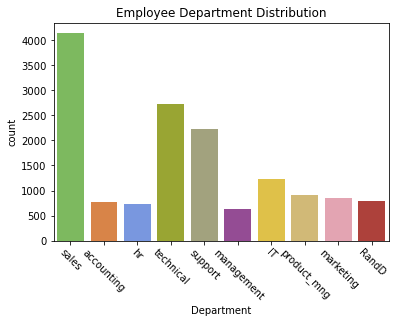

In [16]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']


sns.countplot(x='Department', data=df, palette=color_types).set_title('Employee Department Distribution');
plt.xticks(rotation=-45)

4. Now build logistic regression model using variables that were narrowed down in step 1 

In [28]:
#SELECTING FEATURES

df2 = df[['salary','satisfaction_level', 'average_montly_hours', 'promotion_last_5years','left']]
dummies = pd.get_dummies(df2.salary)
df2 = pd.concat([df2,dummies],axis = 'columns')
df2

,salary,satisfaction_level,average_montly_hours,promotion_last_5years,left,high,low,medium
0,low,0.38,157,0,1,0,1,0
1,medium,0.80,262,0,1,0,0,1
2,medium,0.11,272,0,1,0,0,1
3,low,0.72,223,0,1,0,1,0
4,low,0.37,159,0,1,0,1,0
...,...,...,...,...,...,...,...,...
14994,low,0.40,151,0,1,0,1,0
14995,low,0.37,160,0,1,0,1,0
14996,low,0.37,143,0,1,0,1,0
14997,low,0.11,280,0,1,0,1,0


In [29]:
df2 = df2.drop(['salary'],axis='columns')

In [43]:
#MAKING TRAIN TEST SPLITS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years','high','medium','low']],df2.left, test_size=0.33,random_state = 1)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(X_test)

5. Measure the accuracy (precision,recal,F1 and ROC) of the model

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[3509  247]
 [ 868  326]]


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


print ("Accuracy : ", accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

Accuracy :  0.7747474747474747
Precision :  0.568935427574171
Recall :  0.2730318257956449
F1 Score :  0.36898698358800225


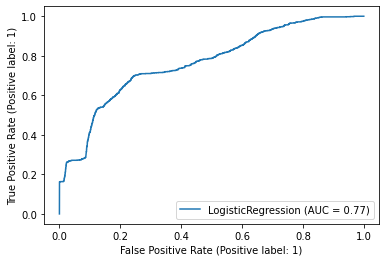

In [50]:
from sklearn import metrics
metrics.plot_roc_curve(model, X_test, y_test)  
plt.show() 